In [1]:
import numpy as np 
import pandas as pd 
import cv2
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D
import os
print(os.listdir("."))

Using TensorFlow backend.


['.git', '.gitignore', '.ipynb_checkpoints', 'Data', 'faces.py', 'folder.py', 'getting_emoji_data.py', 'Human_data', 'LICENSE', 'Models', 'Notebook.ipynb', 'README.md', 'requirements.txt', 'Working_data']


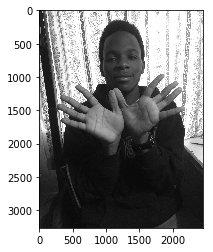

In [31]:
main_dir = "."
train_dir = "Human_data"
path = os.path.join(main_dir,train_dir)

for p in os.listdir(path):
    new= os.path.join(path, p)
    for img in os.listdir(new):
        img_array = cv2.imread(os.path.join(new, img), cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(1632, 1224))
        plt.imshow(img_array, cmap="gray")
        break

In [41]:
X = []
y = []

In [43]:
def create_test_data(path):
    for p in os.listdir(path):
        new= os.path.join(path, p)
        category = p.split("_")[0]
        for img in os.listdir(new):
            img_array = cv2.imread(os.path.join(new, img), cv2.IMREAD_GRAYSCALE)
            new_img_array = cv2.resize(img_array, dsize=(1632, 1224))
            X.append(new_img_array)
            y.append(category.replace("-", " ").lower())

In [45]:
len(X)

0

In [46]:
create_test_data(path)
X = np.array(X).reshape(-1, 1632, 1224, 1)
y = np.array(y)

In [47]:
X.shape

(104, 1632, 1224, 1)

In [48]:
model = Sequential()
model.add(Conv2D(20,(3,3), activation="relu", input_shape=(1632, 1224, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(20,(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(20,(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="softmax"))

model.compile(optimizer="rmsprop",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [49]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
encoder = LabelBinarizer()
transformed_labels = encoder.fit_transform(y)
transformed_labels[6]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [50]:
import keras
from keras.utils import np_utils
one_hot_labels = keras.utils.to_categorical(transformed_labels, num_classes=21)
one_hot_labels[6][20]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.], dtype=float32)

In [52]:
encoder = LabelEncoder()
encoder.fit(y)
small = encoder.transform(y)
small

array([ 0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,
        3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  6,
        6,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10,
       10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13, 13,
       13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 17,
       17, 17, 17, 17, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 20, 20, 20,
       20, 20], dtype=int64)

In [ ]:
model.fit(X, small, epochs=10, batch_size=32, validation_split=0.2)

Train on 83 samples, validate on 21 samples
Epoch 1/10


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
svc = LinearSVC()

knn.fit(X, small)
svc.fit(X, small)

acc_knn = accuracy_score(y_test, knn.predict(X))
acc_svc = accuracy_score(y_test, svc.predict(X))

print(f'KNN accuracy = {acc_knn}, SVM accuracy = {acc_svc}')
